In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'

In [3]:
df = pd.read_csv(url)
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [5]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB


In [6]:
# Basic information about the dataset
rows, columns = df.shape
data_types = df.dtypes
sample_data = df.head()

rows, columns, data_types, sample_data

(161568,
 5,
 Date         datetime64[ns]
 Country              object
 Confirmed             int64
 Recovered             int64
 Deaths                int64
 dtype: object,
         Date      Country  Confirmed  Recovered  Deaths
 0 2020-01-22  Afghanistan          0          0       0
 1 2020-01-23  Afghanistan          0          0       0
 2 2020-01-24  Afghanistan          0          0       0
 3 2020-01-25  Afghanistan          0          0       0
 4 2020-01-26  Afghanistan          0          0       0)

In [7]:
# Basic statistical summary
summary_statistics = df.describe()
summary_statistics

,Confirmed,Recovered,Deaths
count,1.615680e+05,1.615680e+05,161568.000000
mean,7.361569e+05,1.453967e+05,13999.436089
std,3.578884e+06,9.748275e+05,59113.581271
min,0.000000e+00,0.000000e+00,0.000000
25%,1.220000e+03,0.000000e+00,17.000000
50%,2.369200e+04,1.260000e+02,365.000000
75%,2.558420e+05,1.797225e+04,4509.000000
max,8.062512e+07,3.097475e+07,988609.000000


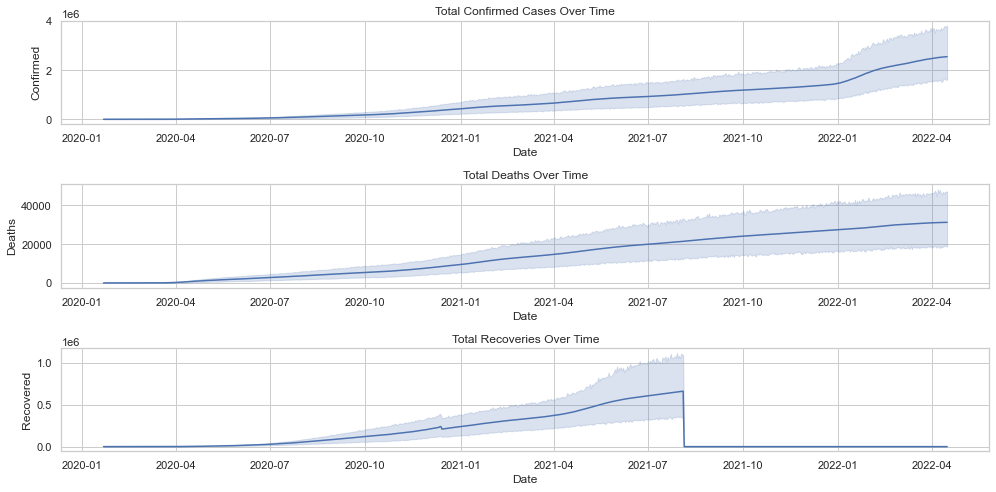

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plotting total confirmed cases, deaths, and recoveries over time
plt.figure(figsize=(14, 7))

# Plot confirmed cases
plt.subplot(3, 1, 1)
sns.lineplot(x='Date', y='Confirmed', data=df)
plt.title('Total Confirmed Cases Over Time')

# Plot deaths
plt.subplot(3, 1, 2)
sns.lineplot(x='Date', y='Deaths', data=df)
plt.title('Total Deaths Over Time')

# Plot recoveries
plt.subplot(3, 1, 3)
sns.lineplot(x='Date', y='Recovered', data=df)
plt.title('Total Recoveries Over Time')

plt.tight_layout()
plt.show()


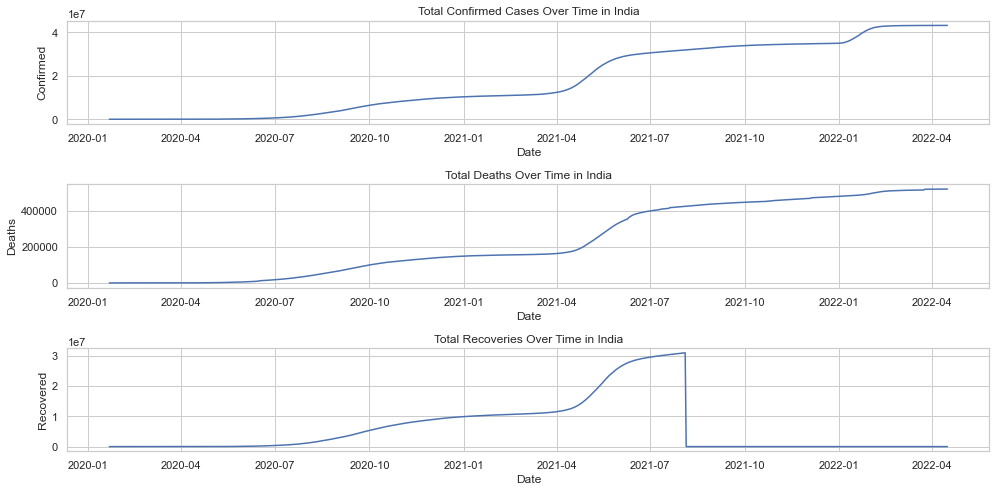

In [9]:
def plot_country_trends(country):
    country_data = df[df['Country'] == country]

    plt.figure(figsize=(14, 7))

    # Plot confirmed cases
    plt.subplot(3, 1, 1)
    sns.lineplot(x='Date', y='Confirmed', data=country_data)
    plt.title(f'Total Confirmed Cases Over Time in {country}')

    # Plot deaths
    plt.subplot(3, 1, 2)
    sns.lineplot(x='Date', y='Deaths', data=country_data)
    plt.title(f'Total Deaths Over Time in {country}')

    # Plot recoveries
    plt.subplot(3, 1, 3)
    sns.lineplot(x='Date', y='Recovered', data=country_data)
    plt.title(f'Total Recoveries Over Time in {country}')

    plt.tight_layout()
    plt.show()

# Example usage
plot_country_trends('India')

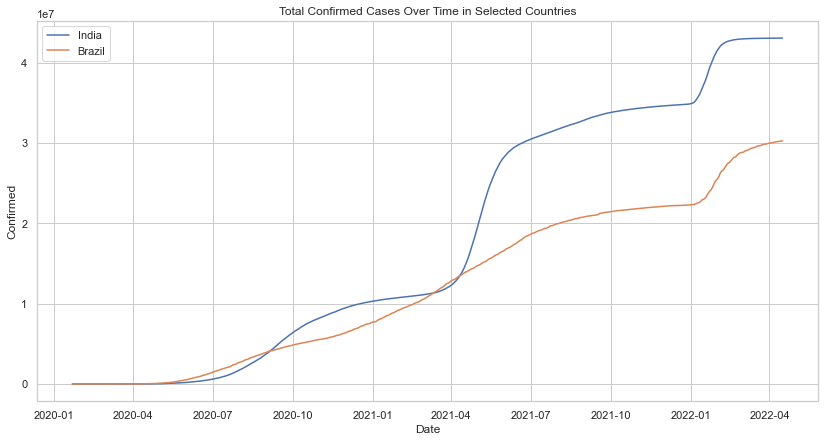

In [10]:
def compare_countries_trends(countries):
    plt.figure(figsize=(14, 7))

    # Plot confirmed cases
    for country in countries:
        country_data = df[df['Country'] == country]
        sns.lineplot(x='Date', y='Confirmed', data=country_data, label=country)

    plt.title('Total Confirmed Cases Over Time in Selected Countries')
    plt.legend()
    plt.show()

# Example usage
compare_countries_trends(['India', 'United States', 'Brazil'])

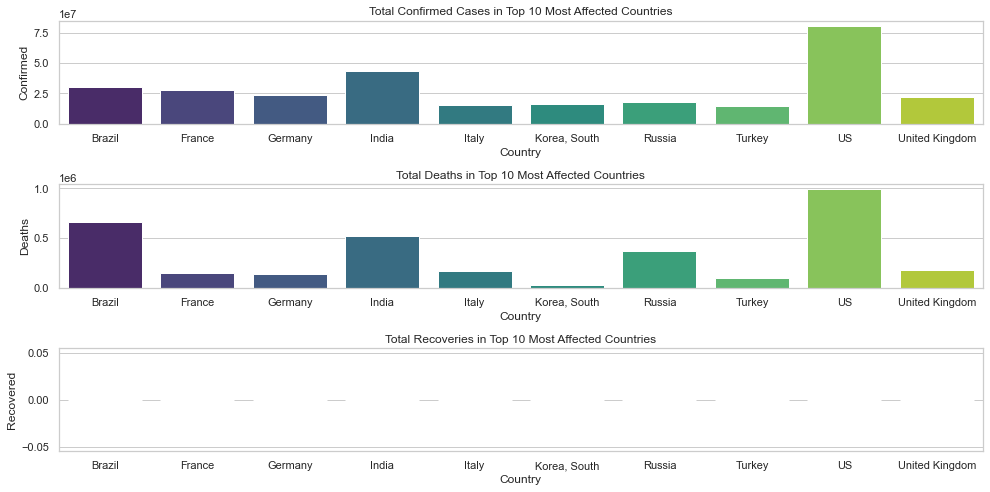

In [11]:
# Identify the top 10 most affected countries by the number of confirmed cases
top_10_countries = df.groupby('Country')['Confirmed'].max().nlargest(10).index

# Filter the dataset for the top 10 countries
top_10_data = df[df['Country'].isin(top_10_countries)]

# Get the latest data for these countries
latest_data = top_10_data[top_10_data['Date'] == top_10_data['Date'].max()]

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot confirmed cases
plt.subplot(3, 1, 1)
sns.barplot(x='Country', y='Confirmed', data=latest_data, palette='viridis')
plt.title('Total Confirmed Cases in Top 10 Most Affected Countries')

# Plot deaths
plt.subplot(3, 1, 2)
sns.barplot(x='Country', y='Deaths', data=latest_data, palette='viridis')
plt.title('Total Deaths in Top 10 Most Affected Countries')

# Plot recoveries
plt.subplot(3, 1, 3)
sns.barplot(x='Country', y='Recovered', data=latest_data, palette='viridis')
plt.title('Total Recoveries in Top 10 Most Affected Countries')

plt.tight_layout()
plt.show()

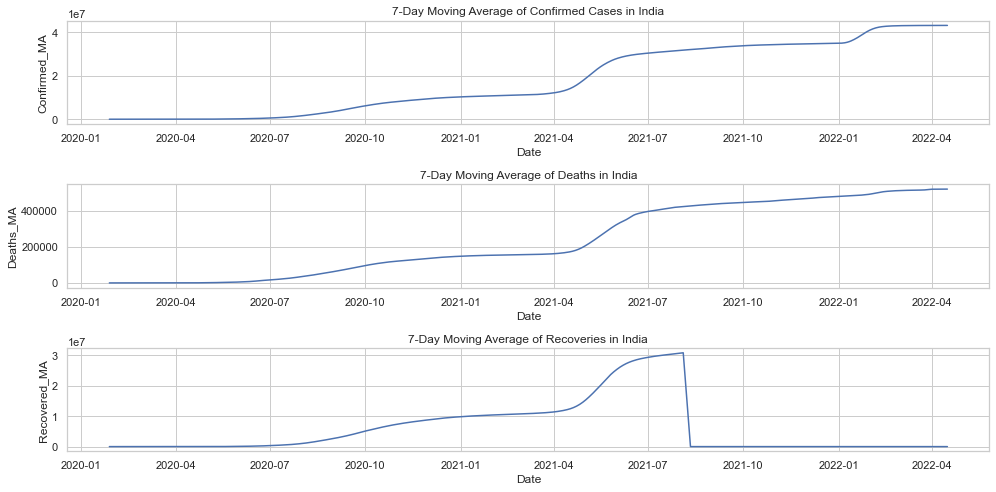

In [12]:
def plot_moving_averages(country):
    country_data = df[df['Country'] == country]
    country_data = country_data.set_index('Date')
    
    # Calculate 7-day moving averages
    country_data['Confirmed_MA'] = country_data['Confirmed'].rolling(window=7).mean()
    country_data['Deaths_MA'] = country_data['Deaths'].rolling(window=7).mean()
    country_data['Recovered_MA'] = country_data['Recovered'].rolling(window=7).mean()

    plt.figure(figsize=(14, 7))

    # Plot moving averages for confirmed cases
    plt.subplot(3, 1, 1)
    sns.lineplot(data=country_data['Confirmed_MA'])
    plt.title(f'7-Day Moving Average of Confirmed Cases in {country}')

    # Plot moving averages for deaths
    plt.subplot(3, 1, 2)
    sns.lineplot(data=country_data['Deaths_MA'])
    plt.title(f'7-Day Moving Average of Deaths in {country}')

    # Plot moving averages for recoveries
    plt.subplot(3, 1, 3)
    sns.lineplot(data=country_data['Recovered_MA'])
    plt.title(f'7-Day Moving Average of Recoveries in {country}')

    plt.tight_layout()
    plt.show()

# Example usage
plot_moving_averages('India')

In [13]:
# Calculate correlation matrix
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()
correlation_matrix

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.914993,0.277797
Deaths,0.914993,1.000000,0.318160
Recovered,0.277797,0.318160,1.000000


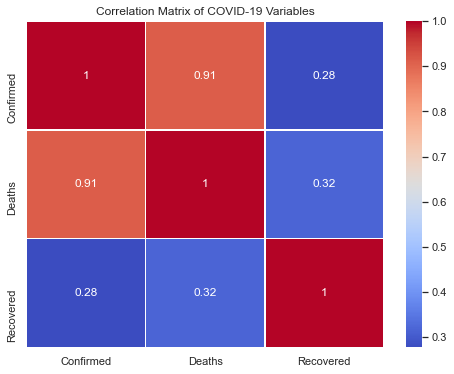

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of COVID-19 Variables')
plt.show()

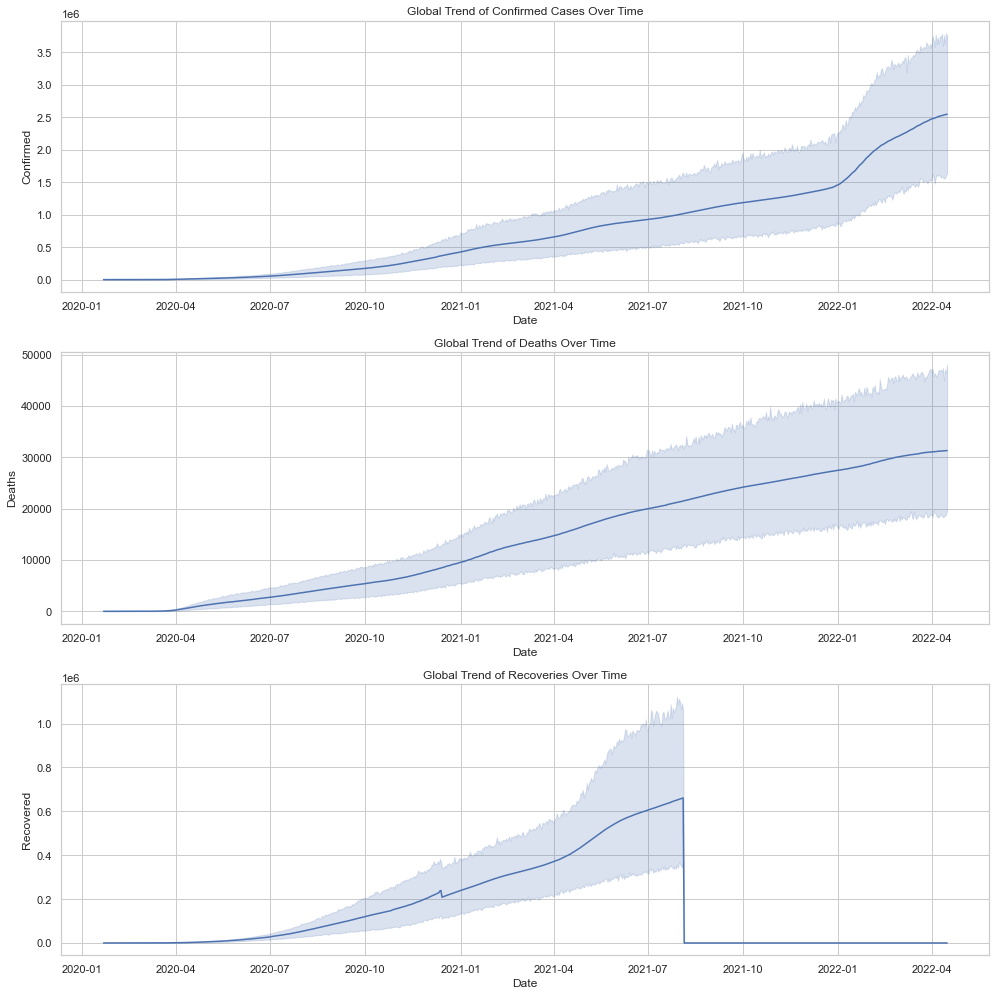

In [15]:
# What is the trend of confirmed cases, deaths, and recoveries globally over time? Draw plots separately.

# Plot global trends for confirmed cases, deaths, and recoveries separately
plt.figure(figsize=(14, 14))

# Plot confirmed cases
plt.subplot(3, 1, 1)
sns.lineplot(x='Date', y='Confirmed', data=df)
plt.title('Global Trend of Confirmed Cases Over Time')

# Plot deaths
plt.subplot(3, 1, 2)
sns.lineplot(x='Date', y='Deaths', data=df)
plt.title('Global Trend of Deaths Over Time')

# Plot recoveries
plt.subplot(3, 1, 3)
sns.lineplot(x='Date', y='Recovered', data=df)
plt.title('Global Trend of Recoveries Over Time')

plt.tight_layout()
plt.show()

In [16]:
# Which country has the highest number of confirmed cases, deaths, and recoveries as of the latest date in the dataset?

# Get the latest date in the dataset
latest_date = df['Date'].max()

# Filter the data for the latest date
latest_data = df[df['Date'] == latest_date]

# Find the country with the highest confirmed cases, deaths, and recoveries
highest_confirmed = latest_data.loc[latest_data['Confirmed'].idxmax()]
highest_deaths = latest_data.loc[latest_data['Deaths'].idxmax()]
highest_recovered = latest_data.loc[latest_data['Recovered'].idxmax()]

highest_confirmed, highest_deaths, highest_recovered

(Date         2022-04-16 00:00:00
 Country                       US
 Confirmed               80625120
 Recovered                      0
 Deaths                    988609
 Name: 150143, dtype: object,
 Date         2022-04-16 00:00:00
 Country                       US
 Confirmed               80625120
 Recovered                      0
 Deaths                    988609
 Name: 150143, dtype: object,
 Date         2022-04-16 00:00:00
 Country              Afghanistan
 Confirmed                 178387
 Recovered                      0
 Deaths                      7676
 Name: 815, dtype: object)

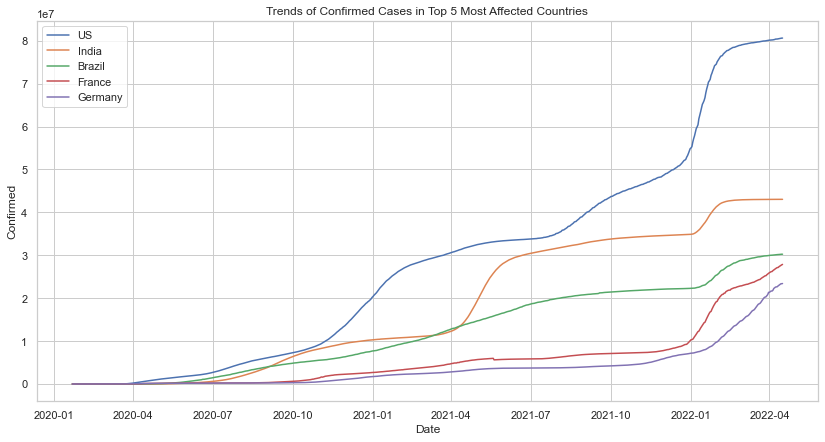

In [17]:
#  How do the trends of confirmed cases differ between the top 5 most affected countries?

# Identify the top 5 most affected countries by the number of confirmed cases
top_5_countries = df.groupby('Country')['Confirmed'].max().nlargest(5).index

# Filter the dataset for the top 5 countries
top_5_data = df[df['Country'].isin(top_5_countries)]

# Plot trends for the top 5 most affected countries
plt.figure(figsize=(14, 7))

# Plot confirmed cases
for country in top_5_countries:
    country_data = top_5_data[top_5_data['Country'] == country]
    sns.lineplot(x='Date', y='Confirmed', data=country_data, label=country)

plt.title('Trends of Confirmed Cases in Top 5 Most Affected Countries')
plt.legend()
plt.show()

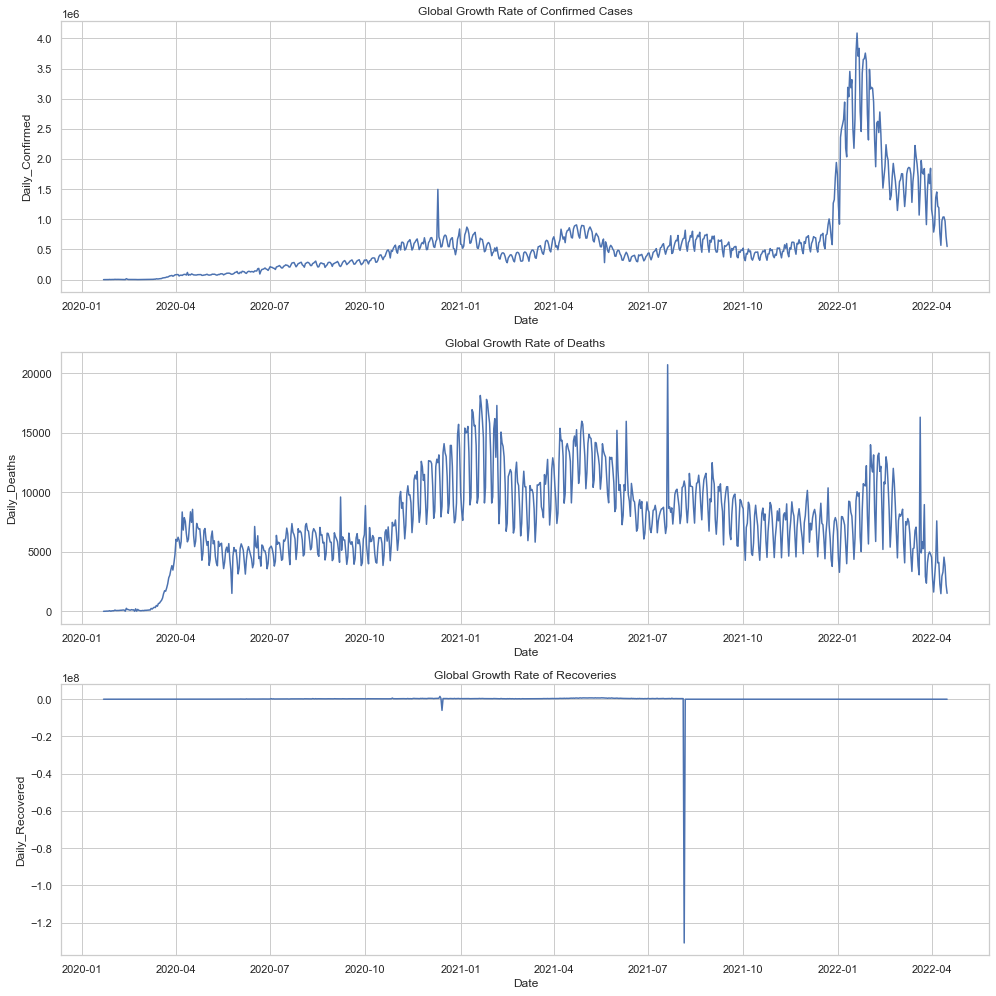

In [18]:
# What is the growth rate of confirmed cases, deaths, and recoveries globally?

# Calculate daily changes to get the growth rate
df['Daily_Confirmed'] = df.groupby('Country')['Confirmed'].diff().fillna(0)
df['Daily_Deaths'] = df.groupby('Country')['Deaths'].diff().fillna(0)
df['Daily_Recovered'] = df.groupby('Country')['Recovered'].diff().fillna(0)

# Plot global growth rates for confirmed cases, deaths, and recoveries
plt.figure(figsize=(14, 14))

# Plot daily confirmed cases
plt.subplot(3, 1, 1)
sns.lineplot(x='Date', y='Daily_Confirmed', data=df.groupby('Date')['Daily_Confirmed'].sum().reset_index())
plt.title('Global Growth Rate of Confirmed Cases')

# Plot daily deaths
plt.subplot(3, 1, 2)
sns.lineplot(x='Date', y='Daily_Deaths', data=df.groupby('Date')['Daily_Deaths'].sum().reset_index())
plt.title('Global Growth Rate of Deaths')

# Plot daily recoveries
plt.subplot(3, 1, 3)
sns.lineplot(x='Date', y='Daily_Recovered', data=df.groupby('Date')['Daily_Recovered'].sum().reset_index())
plt.title('Global Growth Rate of Recoveries')

plt.tight_layout()
plt.show()

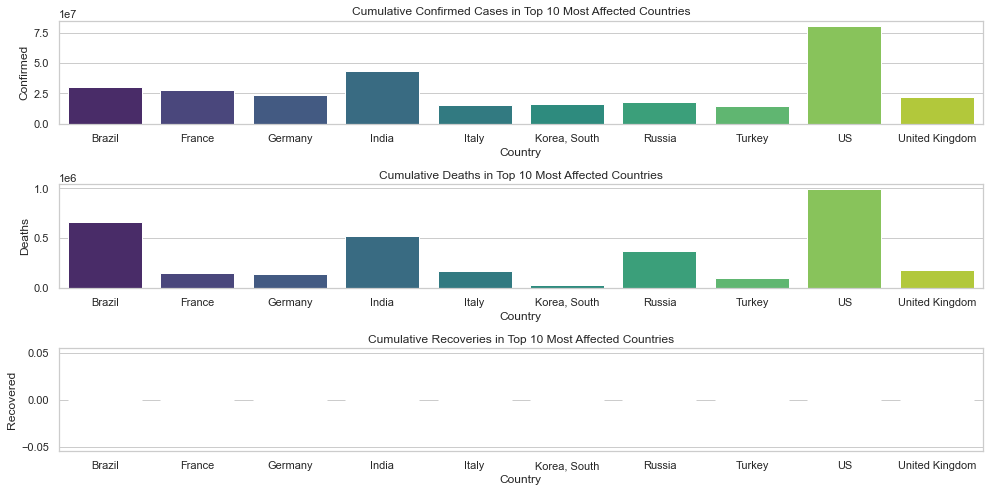

In [19]:
# What are the cumulative confirmed cases, deaths, and recoveries for the top 10 most affected countries?

# Already identified top 10 most affected countries in the previous part
# Filter the data for the latest date and top 10 countries
cumulative_data = latest_data[latest_data['Country'].isin(top_10_countries)]

# Plot cumulative confirmed cases, deaths, and recoveries
plt.figure(figsize=(14, 7))

# Plot confirmed cases
plt.subplot(3, 1, 1)
sns.barplot(x='Country', y='Confirmed', data=cumulative_data, palette='viridis')
plt.title('Cumulative Confirmed Cases in Top 10 Most Affected Countries')

# Plot deaths
plt.subplot(3, 1, 2)
sns.barplot(x='Country', y='Deaths', data=cumulative_data, palette='viridis')
plt.title('Cumulative Deaths in Top 10 Most Affected Countries')

# Plot recoveries
plt.subplot(3, 1, 3)
sns.barplot(x='Country', y='Recovered', data=cumulative_data, palette='viridis')
plt.title('Cumulative Recoveries in Top 10 Most Affected Countries')

plt.tight_layout()
plt.show()

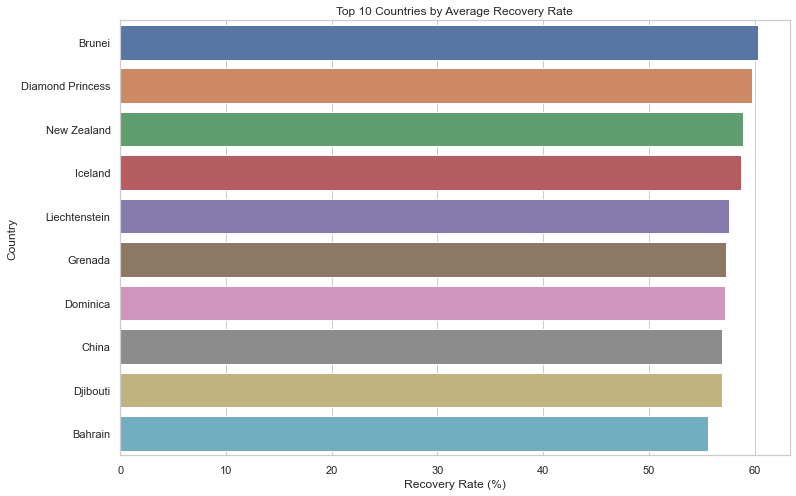

In [20]:
# How does the recovery rate compare across different countries?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load COVID-19 dataset
url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])

# Calculate recovery rate (%)
df['Recovery Rate (%)'] = (df['Recovered'] / df['Confirmed']) * 100

# Group by country and calculate average recovery rate
avg_recovery_rates = df.groupby('Country')['Recovery Rate (%)'].mean().reset_index()

# Sort by recovery rate descending
avg_recovery_rates = avg_recovery_rates.sort_values(by='Recovery Rate (%)', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Recovery Rate (%)', y='Country', data=avg_recovery_rates.head(10))
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Average Recovery Rate')
plt.show()

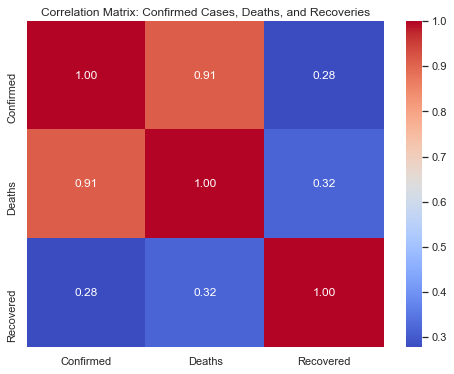

In [21]:
# What is the correlation between confirmed cases, deaths, and recoveries globally?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Confirmed Cases, Deaths, and Recoveries')
plt.show()

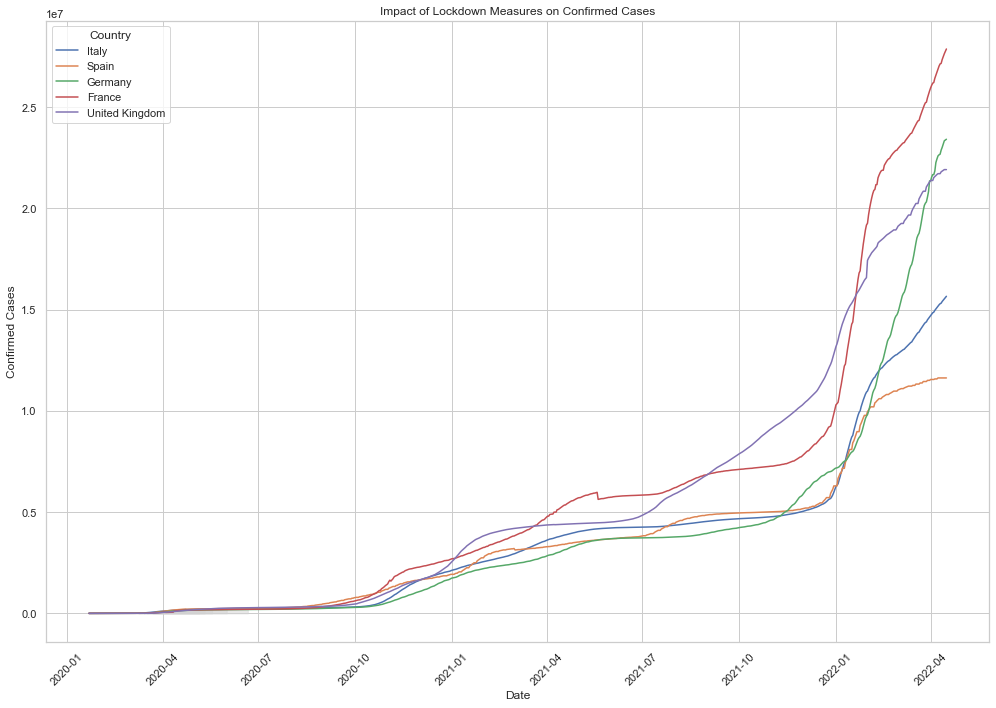

In [22]:
# How do lockdown measures impact the trend of confirmed cases in different countries?

import pandas as pd
import matplotlib.pyplot as plt

# Load COVID-19 data
covid_url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
covid_data = pd.read_csv(covid_url)

# Sample lockdown data
lockdown_data = {
    'Country': ['Italy', 'Spain', 'Germany', 'France', 'United Kingdom'],
    'Lockdown Start': ['2020-03-09', '2020-03-14', '2020-03-22', '2020-03-17', '2020-03-23'],
    'Lockdown End': ['2020-05-18', '2020-06-21', '2020-05-06', '2020-05-11', '2020-06-01']
}
lockdown_df = pd.DataFrame(lockdown_data)

# Convert dates to datetime format
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
lockdown_df['Lockdown Start'] = pd.to_datetime(lockdown_df['Lockdown Start'])
lockdown_df['Lockdown End'] = pd.to_datetime(lockdown_df['Lockdown End'])

# Merge datasets
combined_df = pd.merge(covid_data, lockdown_df, on='Country', how='left')

# Plotting
plt.figure(figsize=(14, 10))
for country in lockdown_df['Country']:
    country_data = combined_df[combined_df['Country'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

    # Highlight lockdown period
    lockdown_period = country_data[(country_data['Date'] >= country_data['Lockdown Start'].iloc[0]) &
                                   (country_data['Date'] <= country_data['Lockdown End'].iloc[0])]
    plt.fill_between(lockdown_period['Date'], lockdown_period['Confirmed'],
                     color='lightgray', alpha=0.5)

plt.title('Impact of Lockdown Measures on Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths', 'ISO code',
       'Source URL', 'Source label', 'Notes', 'Cumulative total',
       'Daily change in cumulative total', 'Cumulative total per thousand',
       'Daily change in cumulative total per thousand',
       '7-day smoothed daily change',
       '7-day smoothed daily change per thousand', 'Short-term positive rate',
       'Short-term tests per case'],
      dtype='object')


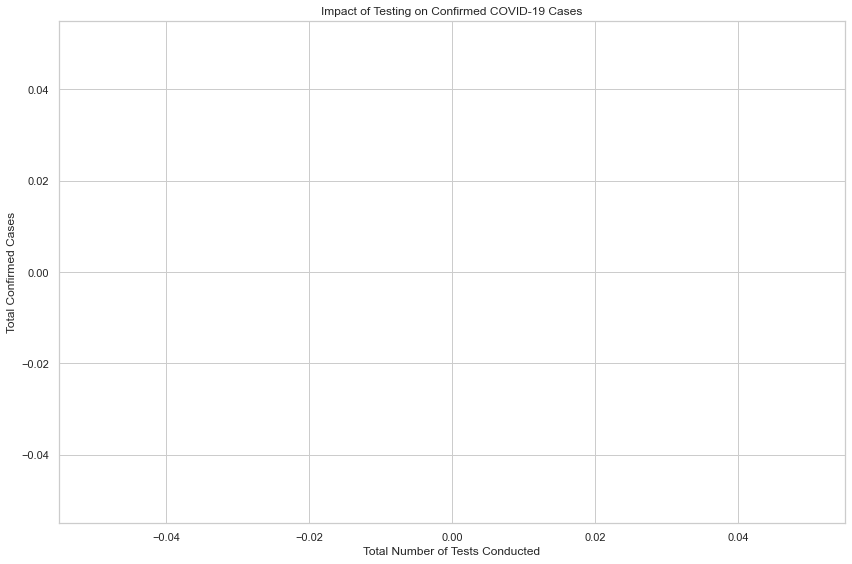

In [25]:
# How does the number of tests conducted relate to the number of confirmed cases in various countries?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load COVID-19 data
covid_url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
covid_data = pd.read_csv(covid_url)

# Load testing data
testing_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv"
testing_data = pd.read_csv(testing_url)

# Rename columns for consistency
testing_data.rename(columns={'Entity': 'Country'}, inplace=True)

# Convert 'Date' columns to datetime format
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
testing_data['Date'] = pd.to_datetime(testing_data['Date'])

# Merge datasets on 'Country' and 'Date'
combined_data = pd.merge(covid_data, testing_data, on=['Country', 'Date'], how='left')

# Check columns to ensure tests data is included
print(combined_data.columns)

# Plot relationship between tests conducted and confirmed cases
plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_data, x='Cumulative total', y='Confirmed')
plt.title('Impact of Testing on Confirmed COVID-19 Cases')
plt.xlabel('Total Number of Tests Conducted')
plt.ylabel('Total Confirmed Cases')
plt.tight_layout()
plt.show()

<Figure size 864x432 with 0 Axes>

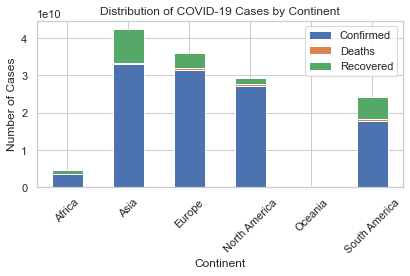

In [27]:
# What is the distribution of confirmed cases, deaths, and recoveries by continent?

import pandas as pd
import matplotlib.pyplot as plt

# Load COVID-19 data
covid_url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
covid_data = pd.read_csv(covid_url)

# Load continent information
continent_url = "https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv"
continent_data = pd.read_csv(continent_url)

# Rename columns for consistency
continent_data.rename(columns={'Country': 'Country', 'Continent': 'Continent'}, inplace=True)

# Merge with continent information
merged_data = pd.merge(covid_data, continent_data, on='Country', how='left')

# Group by continent
continent_summary = merged_data.groupby('Continent')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
continent_summary.set_index('Continent').plot(kind='bar', stacked=True)
plt.title('Distribution of COVID-19 Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()